# Decision Tree

In [ ]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
from sklearn.metrics import mean_squared_error

In [ ]:
#Import the two cleaned datasets
# dataset with the threshold
file_path = 'C:/Users/Gaëlle/Documents/_CAS applied data science/3. Module 3 Data analysis and machine learning/Project/Models/final_GMA.csv'
df = pd.read_csv(file_path)

In [ ]:
column_names=df.columns.tolist()
#column_names

## Use dataset with the c-section rate

## Creation of the X, Y, train and test

In [ ]:
# Creation of the dependant variable
target_field = 'c_section_rate'
Y = df[target_field].copy()

In [ ]:
# Set of independant variables
X = df.drop(columns=['c_section_rate','threshold', 'name_hosp']) # I delete threshold because we are using c-section rate

In [ ]:
X.shape

(298, 466)

In [ ]:
x = X.to_numpy().astype(np.float32)
y = Y.to_numpy().astype(np.float32)

In [ ]:
# train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Decision Tree

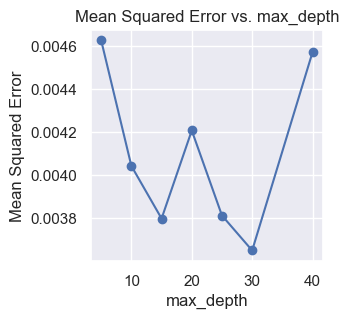

In [ ]:
### Identify the max_depth

# List of max_depth values to test
max_depth_values = [5, 10, 15, 20, 25, 30, 40]

# Lists to store results
max_depth_list = []
mse_list = []

# Loop through max_depth values
for max_depth in max_depth_values:
    # Create and train the Decision Tree model
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = dt.predict(x_test)

    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)

    # Append results to lists
    max_depth_list.append(max_depth)
    mse_list.append(mse)

# Plot the results
plt.figure(figsize=(3, 3))
plt.plot(max_depth_list, mse_list, marker='o')
plt.title('Mean Squared Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

It looks like max_depth 30 gives the lowest mse

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=30)
# Entraînement du modèle
dt_model.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
predictions = dt_model.predict(x_test)

# Évaluation du modèle
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0038565298705929988


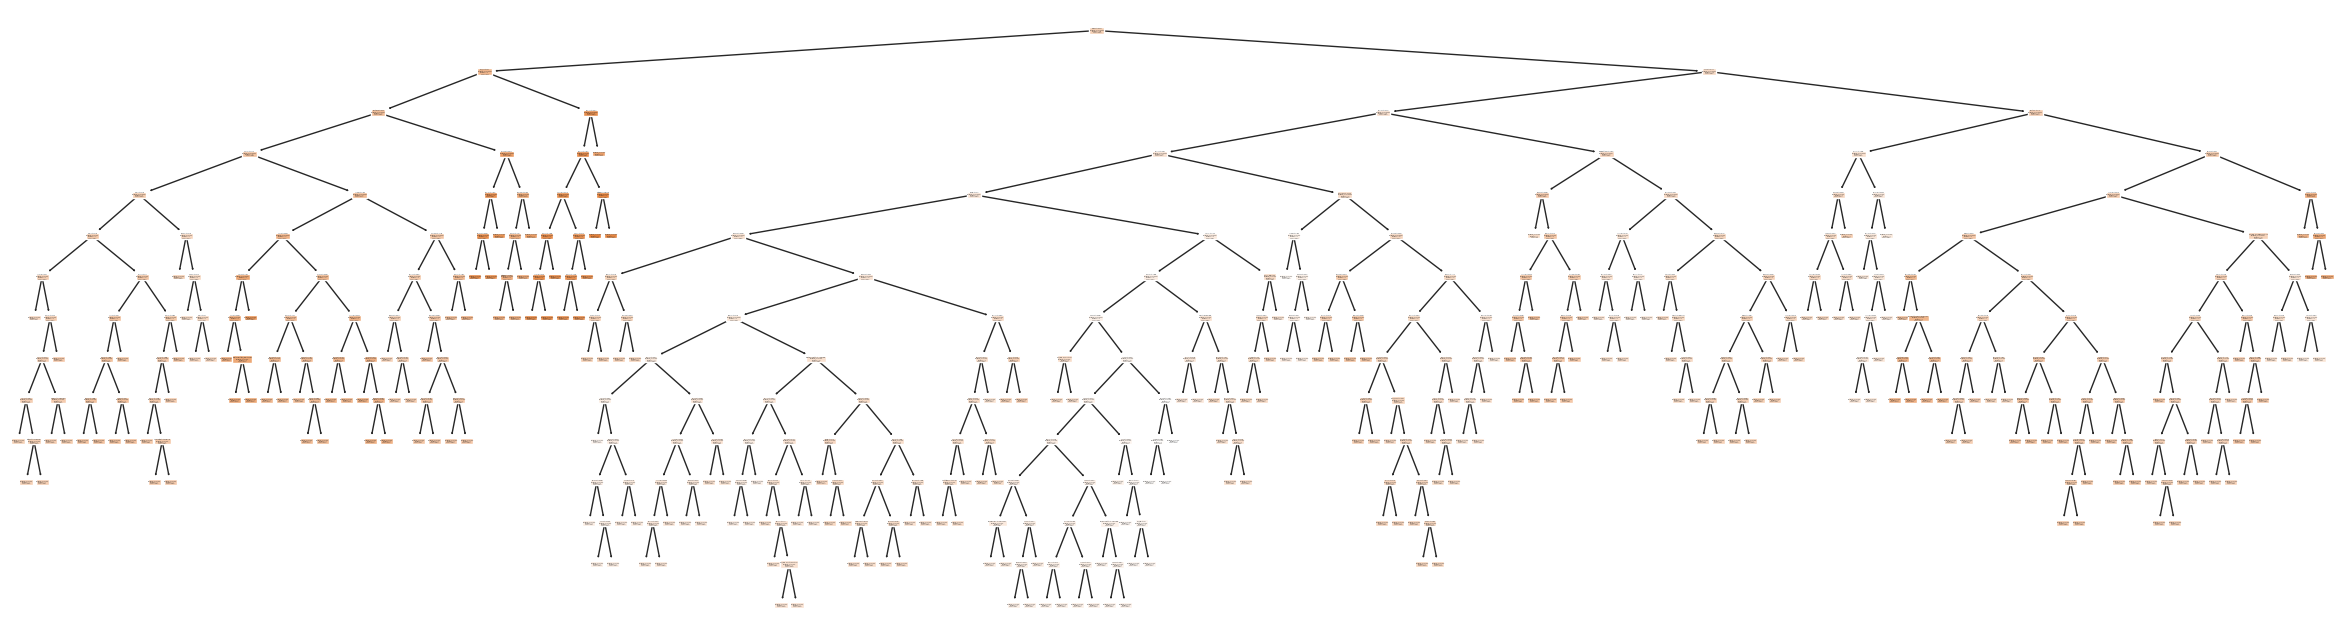

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Visualisation de l'arbre
plt.figure(figsize=(30, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns)

plt.show()

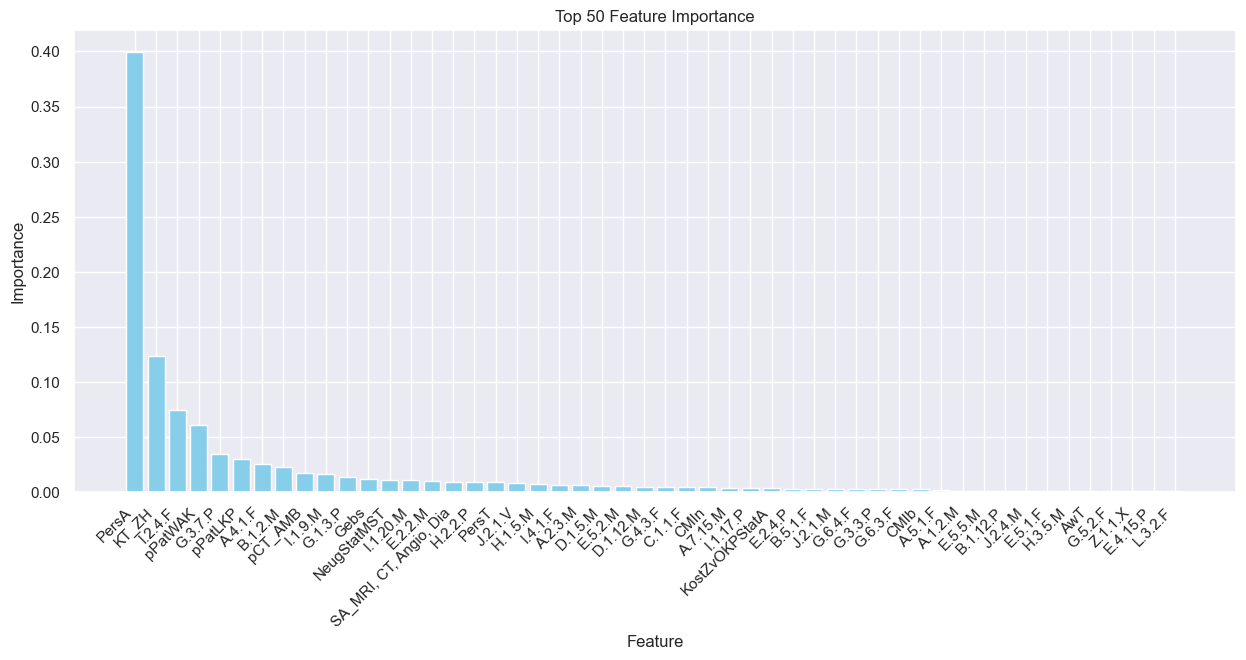

In [ ]:
# Visualization of feature importance
feature_importance = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 50 most important features
top_50_features = feature_importance_df.head(50)

# Create a second figure for the visualization of the top 50 feature importance
plt.figure(figsize=(15, 6))
plt.bar(top_50_features['Feature'], top_50_features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.show()

In [ ]:
top_50_features
top_50_features.to_csv('C:/Users/Gaëlle/Documents/_CAS applied data science/3. Module 3 Data analysis and machine learning/Project/Models/top_50_features_tree_2.csv')

# Random Forest

### Fit the model

In [ ]:
max_depth=30
n_est=50
rfc = ensemble.RandomForestRegressor(max_depth=max_depth, n_estimators=n_est,)
rfc.fit(x_train, y_train)
yy_test = rfc.predict(x_test)
yy_train = rfc.predict(x_train)
print("training score : %.3f (max_depth=%d, n_est=%d)" % (rfc.score(x_train, y_train), max_depth, n_est))
print("test score : %.3f (max_depth=%d, n_est=%d)" % (rfc.score(x_test, y_test), max_depth, n_est))

training score : 0.954 (max_depth=30, n_est=50)
test score : 0.675 (max_depth=30, n_est=50)


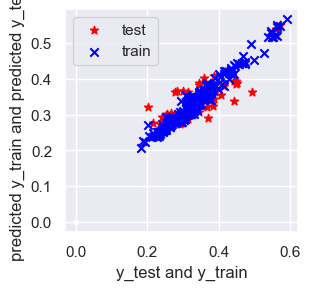

In [ ]:
# How does it compare to linear model? Can you make a plot of y_pred vs y_exact as you did for a linear model and compare visually ?
plt.figure(figsize=(3,3))

plt.scatter(y_test, yy_test, label='test', marker='*',  c='red')
plt.scatter(y_train, yy_train, label='train', marker='x',c='blue')
plt.plot([0], [0], 'w.')  # dummy to show the origin

plt.xlabel("y_test and y_train")
plt.ylabel("predicted y_train and predicted y_test")
plt.gca().set_aspect('equal')#optional

plt.legend()

plt.show()

### Feature importance

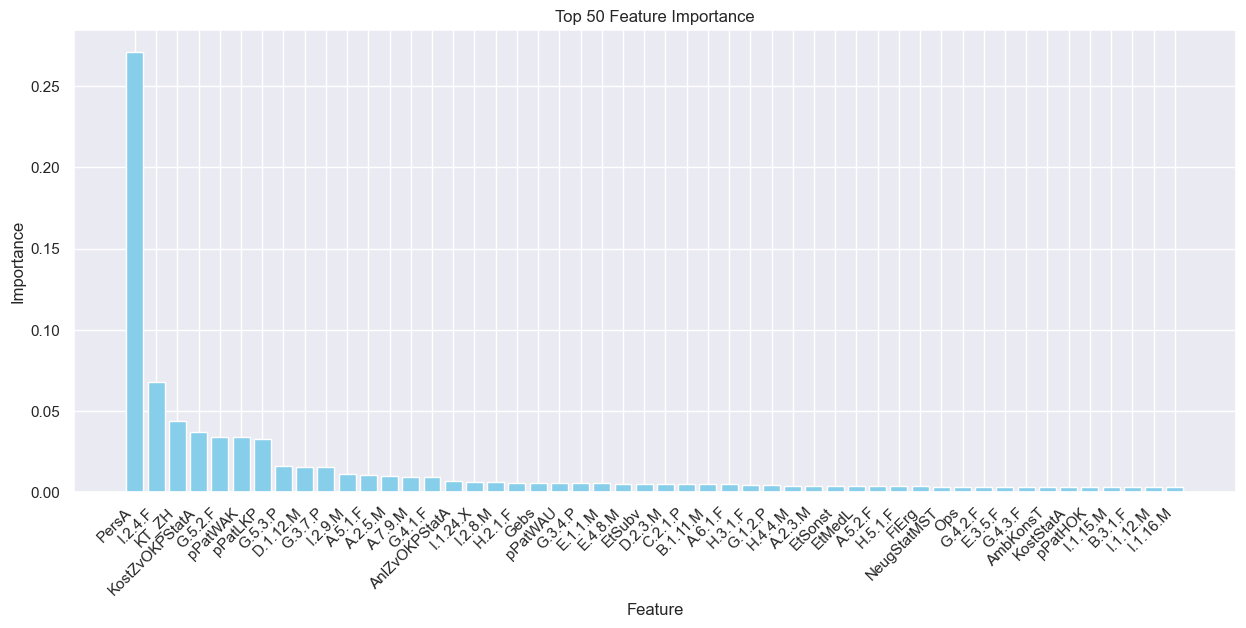

In [ ]:
# Visualization of feature importance
feature_importance = rfc.feature_importances_
feature_importance_rfc = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_rfc = feature_importance_rfc.sort_values(by='Importance', ascending=False)

# Select the top 50 most important features
top_50_features = feature_importance_rfc.head(50)

# Create a second figure for the visualization of the top 50 features importance
plt.figure(figsize=(15, 6))
plt.bar(top_50_features['Feature'], top_50_features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.show()


In [ ]:
top_50_features.to_csv('C:/Users/Gaëlle/Documents/_CAS applied data science/3. Module 3 Data analysis and machine learning/Project/Models/top_50_features_random_forest_2.csv')